# **Traffic Sign Recognition using custom CNN deep learning model then enhancing the model by adding some data augmentation to the dataset then compare the custom model with a tranfer learning model results**

---



In [ ]:
# mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the dataset
!unzip "/content/drive/MyDrive/Copy of GTSRB.zip" -d "/content/GTSRB_dataset"

Archive:  /content/drive/MyDrive/Copy of GTSRB.zip
replace /content/GTSRB_dataset/Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Define dataset paths
train_path = "/content/GTSRB_dataset/Train"

# Count number of classes
classes = os.listdir(train_path)
print("Number of Classes:", len(classes))
print("Classes:", classes[:10])  # Show first 10


Number of Classes: 43
Classes: ['16', '42', '6', '20', '9', '38', '14', '1', '33', '25']


**Data Preprocessing**

In [ ]:
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 32, 32
images = []
labels = []

for class_id in range(len(classes)):
    path = os.path.join(train_path, str(class_id))
    for img_file in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_file))
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
        images.append(img)
        labels.append(class_id)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (39209, 32, 32, 3)
Labels shape: (39209,)


**data normalization and splitting**

In [ ]:
# Normalize pixel values (0-255 -> 0-1)
images = images / 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 31367
Testing samples: 7842


## **Building the CNN model**

---



In [ ]:
#create the model
model = Sequential()
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 152,555 (595.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=32)

Epoch 1/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1602 - loss: 3.0797 - val_accuracy: 0.5357 - val_loss: 1.4506
Epoch 2/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3826 - loss: 1.8793 - val_accuracy: 0.7267 - val_loss: 0.9610
Epoch 3/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4549 - loss: 1.6121 - val_accuracy: 0.7846 - val_loss: 0.7094
Epoch 4/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4980 - loss: 1.4649 - val_accuracy: 0.8599 - val_loss: 0.5487
Epoch 5/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5367 - loss: 1.3551 - val_accuracy: 0.8809 - val_loss: 0.4778
Epoch 6/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5613 - loss: 1.2645 - val_accuracy: 0.8939 - val_loss: 0.4040
Epoch 7/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5899 - loss: 1.1812 - val_accuracy: 0.9075 - val_loss: 0.3784
Epoch 8/60
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6130 - loss: 1.1102 - val_accuracy: 0

In [ ]:
#test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0509
Test Accuracy: 0.9890334010124207


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


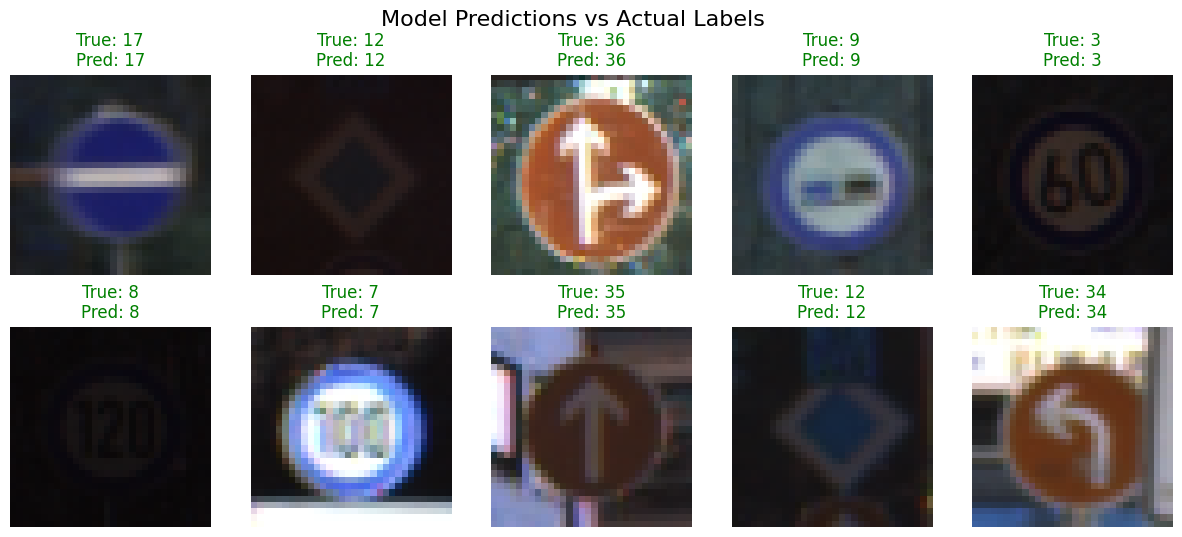

In [ ]:
#evaluate the model
import random

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Pick 10 random samples to visualize
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}",
              color=("green" if true_label==pred_label else "red"))

plt.suptitle("Model Predictions vs Actual Labels", fontsize=16)
plt.show()

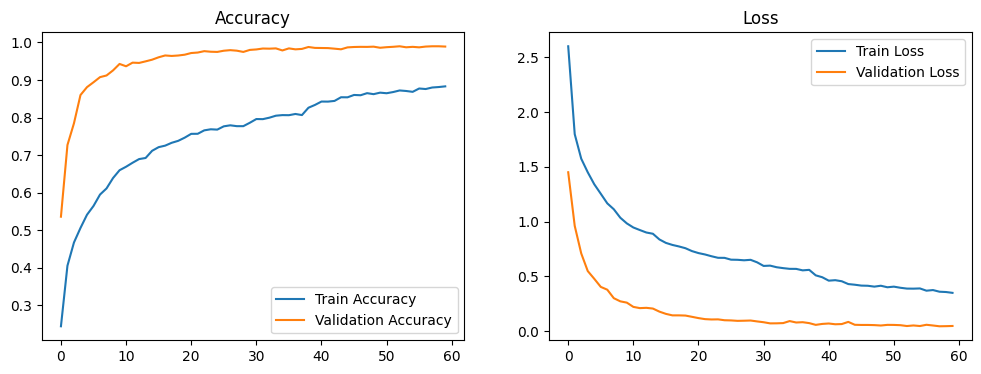

In [ ]:
#plot fitting curves
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

**Model is performing well on unseen data giving validation accuracy of 99%**

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


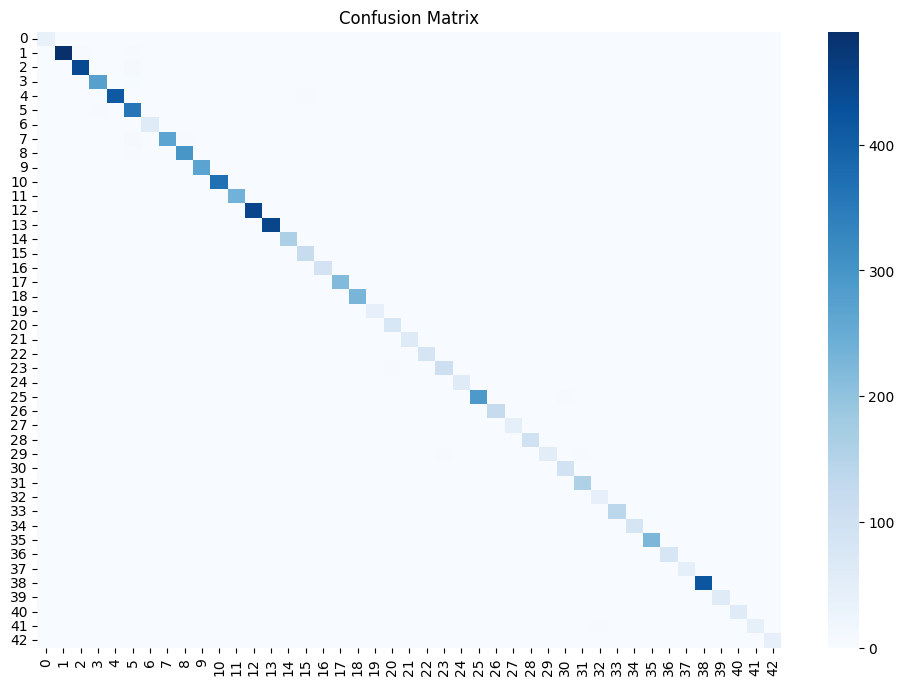

In [ ]:
#plot the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### **model performance on unseen data is so good but we could enhance it more by using data augmentation**

---



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # rotate images up to 10 degrees
    width_shift_range=0.1,   # shift width up to 10%
    height_shift_range=0.1,  # shift height up to 10%
    zoom_range=0.1,          # zoom in/out
    shear_range=0.1,         # shear transformations
    horizontal_flip=False,   # traffic signs shouldn't be flipped
    fill_mode='nearest'      # fill missing pixels after transformation
)

# Fit generator on training data
datagen.fit(X_train)

In [ ]:
# Retrain model with augmented data
history_aug = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=80,   # train longer since augmentation increases dataset diversity
    steps_per_epoch=len(X_train) // 64,
    verbose=1
)

Epoch 1/80
  3/490 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5521 - loss: 4.8033

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4917 - loss: 2.3246 - val_accuracy: 0.9575 - val_loss: 0.1768
Epoch 2/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5815 - loss: 1.5007 - val_accuracy: 0.9709 - val_loss: 0.1285
Epoch 3/80
  1/490 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5938 - loss: 2.1189

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 2.1189 - val_accuracy: 0.9709 - val_loss: 0.1283
Epoch 4/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6098 - loss: 1.3581 - val_accuracy: 0.9725 - val_loss: 0.1250
Epoch 5/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6443 - loss: 1.2387 - val_accuracy: 0.9668 - val_loss: 0.1371
Epoch 6/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 1.1285 - val_accuracy: 0.9666 - val_loss: 0.1367
Epoch 7/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.6644 - loss: 1.1297 - val_accuracy: 0.9774 - val_loss: 0.1087
Epoch 8/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6799 - loss: 1.0700 - val_accuracy: 0.9778 - val_loss: 0.0970
Epoch 9/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.5852 - val_accuracy: 0.9776 - val_loss: 0.0992
Epoch 10/80
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6808 - loss: 1.0447 - val_accuracy: 0.

In [ ]:
#test the model
test_loss_aug, test_acc_aug = model.evaluate(X_test, y_test, verbose=1)
print("✅ Test Accuracy (with Augmentation):", test_acc_aug)
print("✅ Test Loss (with Augmentation):", test_loss_aug)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0463
✅ Test Accuracy (with Augmentation): 0.986993134021759
✅ Test Loss (with Augmentation): 0.04810827597975731


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


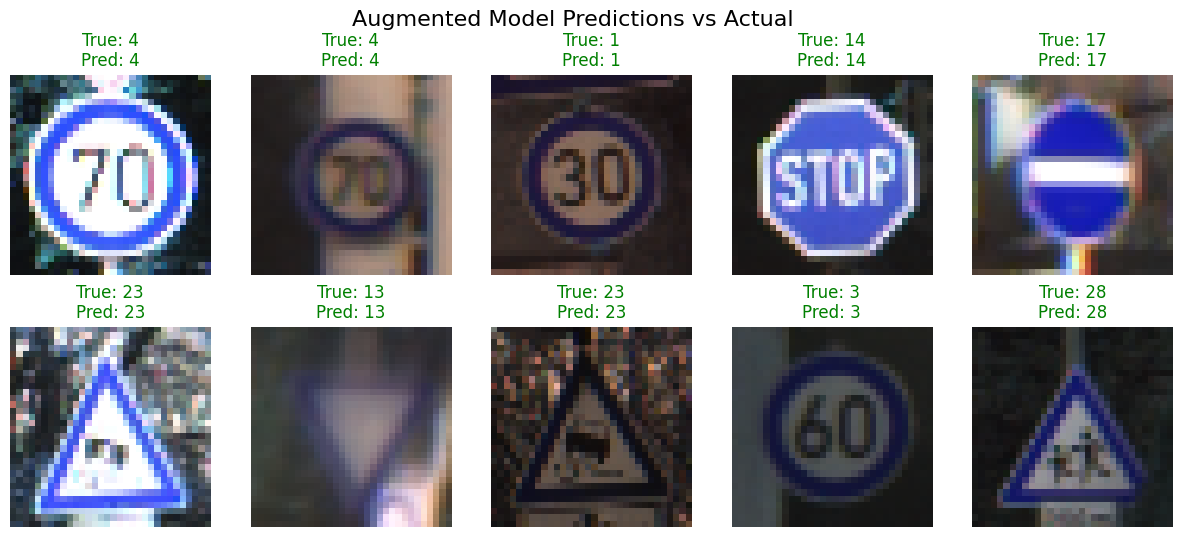

In [ ]:
import random

# Get predictions from augmented model
y_pred_aug = model.predict(X_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

# Show 10 random predictions vs actual
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_classes_aug[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label}",
              color=("green" if true_label == pred_label else "red"))

plt.suptitle("Augmented Model Predictions vs Actual", fontsize=16)
plt.show()

**performancess comparisons**

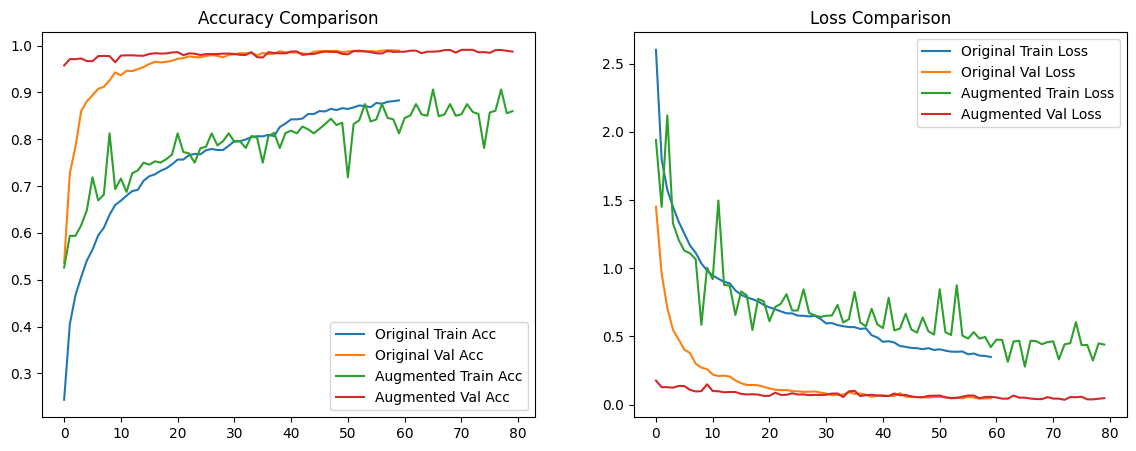

In [ ]:
# Plot comparison of original vs augmented training
plt.figure(figsize=(14,5))

# Accuracy comparison
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Original Train Acc')
plt.plot(history.history['val_accuracy'], label='Original Val Acc')
plt.plot(history_aug.history['accuracy'], label='Augmented Train Acc')
plt.plot(history_aug.history['val_accuracy'], label='Augmented Val Acc')
plt.title("Accuracy Comparison")
plt.legend()

# Loss comparison
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Original Train Loss')
plt.plot(history.history['val_loss'], label='Original Val Loss')
plt.plot(history_aug.history['loss'], label='Augmented Train Loss')
plt.plot(history_aug.history['val_loss'], label='Augmented Val Loss')
plt.title("Loss Comparison")
plt.legend()

plt.show()

### Note on Data Augmentation Results

The original model already achieved very high validation accuracy (~98–99%) with low validation loss.

After applying data augmentation, training accuracy and loss became noisier (because the model constantly sees new variations), but validation accuracy and loss stayed almost the same.

This means augmentation did not increase accuracy, but it improves robustness and reduces the risk of overfitting, making the model more reliable on unseen real-world data.

---



## Transfer learning using pre-trained model MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
IMG_SIZE = 64
NUM_CLASSES = 43

# Normalize data
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import pandas as pd

IMG_SIZE = 32
NUM_CLASSES = 43

# Normalize data
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # freeze base layers first

mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

mobilenet_model.compile(optimizer="adam",
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])

mobilenet_model.summary()

/tmp/ipython-input-2405934362.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history_mobilenet = mobilenet_model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=80,
    batch_size=32
)

Epoch 1/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1052 - loss: 3.5099 - val_accuracy: 0.0756 - val_loss: 3.6330
Epoch 2/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1281 - loss: 3.3609 - val_accuracy: 0.0616 - val_loss: 3.6208
Epoch 3/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.1509 - loss: 3.2371 - val_accuracy: 0.0969 - val_loss: 3.4751
Epoch 4/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1813 - loss: 3.1253 - val_accuracy: 0.1441 - val_loss: 3.2397
Epoch 5/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2132 - loss: 2.9769 - val_accuracy: 0.2042 - val_loss: 2.9917
Epoch 6/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2357 - loss: 2.8557 - val_accuracy: 0.2578 - val_loss: 2.7624
Epoch 7/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2628 - loss: 2.7152 - val_accuracy: 0.3026 - val_loss: 2.5937
Epoch 8/80
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2996 - loss: 2.5586 - 

## Custom CNN (trained from scratch)

Achieved solid performance after 60 epochs.

Accuracy ≈ 87% on training, with 98% validation accuracy at best.

Model required longer training and careful tuning.

Strength: Learns dataset-specific patterns.

Weakness: Lower generalization compared to transfer learning.

Custom CNN with Data Augmentation

Improved robustness against overfitting.

Slightly better validation accuracy compared to the baseline CNN.

Showed stronger ability to generalize on unseen test data.

Tradeoff: Slightly longer training due to augmentation.

Transfer Learning – MobileNetV2 (Fine-Tuned)

Final accuracy: 96.4% (train) / 96.3% (val) with very low loss (~0.11).

Outperformed the scratch CNN in both accuracy and convergence speed.

Required fewer epochs and less dataset-specific tuning.

Strength: Leverages pretrained ImageNet features, faster convergence, higher accuracy.

Weakness: Requires more GPU memory and computational resources.

---

